# Vector Arithmetics
> arithmetic operations on vectors and their *geometrical* meaning

## Vector Addition

Given two vectors $ v_{1} = (v1_{x}, v1_{y}) $ and $ v_{2} = (v2_{x}, v2_{y}) $:

$$ v_{1} + v_{2} = (v1_{x} + v2_{x}, v1_{y} + v2_{y}) $$

Thus, we can define a function that performs the sum of two vectors as:

In [2]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

v1 = (4, 3)
v2 = (-1, 1)
v = add(v1, v2)
print(v)

(3, 4)


Let's visualize it:

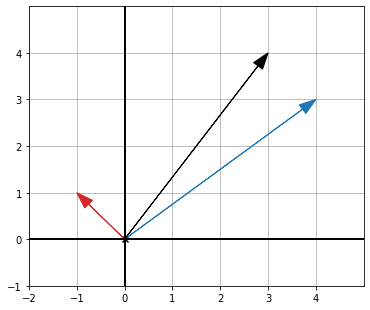

In [3]:
from vector_drawing import draw, Arrow, blue, black, red

draw(Arrow(v1, color=blue), Arrow(v2, color=red), Arrow(v, color=black))

If we look closely, we see that the *black* vector is the result of making the tip of the *blue* vector move the distance and direction of the *red* vector.

This can be more easily understood if we draw the *red* vector at the tip of the *blue* one:

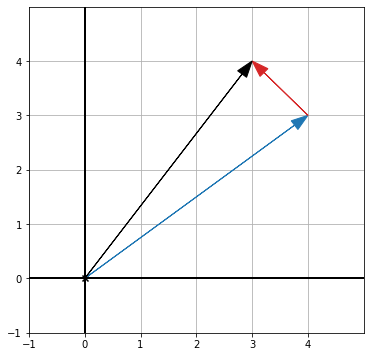

In [4]:
draw(Arrow(v1, color=blue), Arrow(v, v1, color=red), Arrow(v, color=black))

This is known in geometry as a **translation**.

We can apply a translation to our good old dino, by adding a certain vector to each of its points:

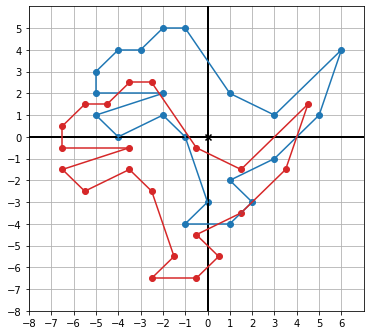

In [5]:
dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

translated_dino_points = [add((-1.5, -2.5), p) for p in dino_points]

from vector_drawing import Points, Polygon

draw(
  Points(*dino_points, color=blue),
  Polygon(*dino_points, color=blue),
  Points(*translated_dino_points, color=red),
  Polygon(*translated_dino_points, color=red)
)

The translation can be easily seen by explictly drawing the vectors.

First using an *old-school* approach:

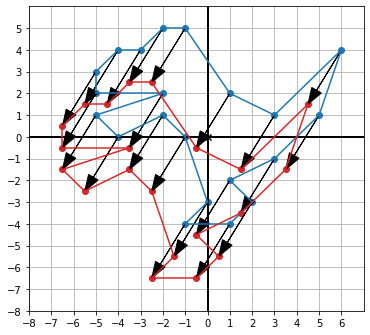

In [6]:
arrows = []
for i in range(0, len(dino_points)):
  arrows.append(Arrow(translated_dino_points[i], dino_points[i], color=black))

draw(
  Points(*dino_points, color=blue),
  Polygon(*dino_points, color=blue),
  Points(*translated_dino_points, color=red),
  Polygon(*translated_dino_points, color=red),
  *arrows
)

And now much cleaner implementation with the same result using `zip()`:

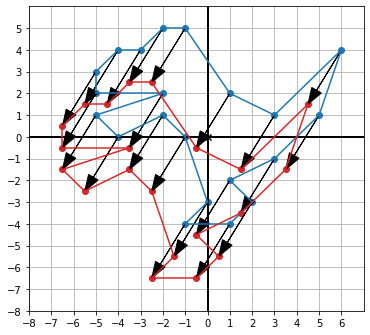

In [7]:
arrows = [Arrow(z[0], z[1], color=black) for z in zip(translated_dino_points, dino_points)]
draw(
  Points(*dino_points, color=blue),
  Polygon(*dino_points, color=blue),
  Points(*translated_dino_points, color=red),
  Polygon(*translated_dino_points, color=red),
  *arrows
)

## Vector Components and Length of a Vector

Many times it's useful to decompose a vector as a sum of other *simpler* vectors. This also happens is real-life situations: it's more natural when using directions to say "go 4 blocks east, then 3 blocks north" than "go 800 meters northeast".

One of the simplest way to decompose a vector is using the base $$ \{(1, 0), (0, 1)\} $$. That is, for example:

$ (4, 3) = (4, 0) + (0, 3) $

These are typically called the *x* and *y* components of the vector.

The **length of the vector** is the length of the arrow that represents it, that is, the length is the distance from the origin of the plane to the point that represents it.

That can be easily calculated if we recall the *Pythagorean Theorem*:
> For a right triangle (a triangle having two sides meeting at a 90° angle), the square of the length of the longest side (hypotenuse) is the sum of the squares of the lengths of the other two sides.

$ a^{2} = b^{2} + c^{2} $

Using the *x* and *y* components of a vector, and the *tip-to-tail* property of the vector addition makes it really easy to compute the length of a vector:

$ length(v) = \sqrt{b^{2} + c^{2}} $

In [8]:
from math import sqrt

def length(v):
    return sqrt(v[0]**2 + v[1]**2)

print(length((4, 3)))

5.0


## Scalar Product &mdash; Multiplying Vectors by Numbers

The result of adding a given vector $$ v $$ a certain number of times can be written with an *scalar product*:

$ v + v + v + v + v = 5 \cdot v $

Ordinary numbers are often called *scalars*. Also, *scalar* resembles *scale* and that's exactly the geometry interpretation of the *scalar product*: multiplying a given vector $ v $ by $ 2.5 $ scales the dimensions of $ v $ $ 2.5 $ times. 


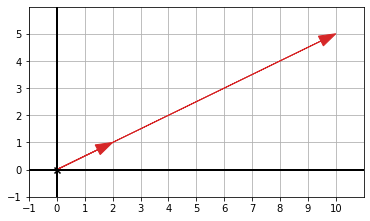

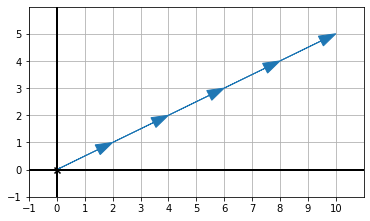

In [9]:
v = (2, 1)
v_5 = add(add(add(add(v, v), v), v), v)
draw(Arrow(v), Arrow(v_5))

v_2 = add(v, v)
v_3 = add(v_2, v)
v_4 = add(v_3, v)
draw(Arrow(v, color=blue), Arrow(v_2, v, color=blue), Arrow(v_3, v_2, color=blue), Arrow(v_4, v_3, color=blue), Arrow(v_5, v_4, color=blue))

We can enhance the vector addition operation to support multiple arguments, instead of only two

(9, 5)
(15, 6)


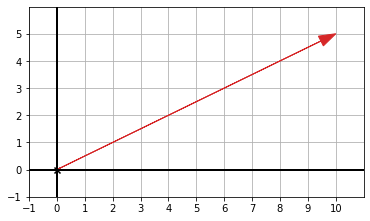

In [10]:
def add(v1, v2, *v):
    resulting_vector = (v1[0] + v2[0], v1[1] + v2[1])
    for vi in v:
        resulting_vector = (resulting_vector[0] + vi[0], resulting_vector[1] + vi[1])
    return resulting_vector

v1 = (4, 3)
v2 = (5, 2)
v3 = (6, 1)
print(add(v1, v2))
print(add(v1, v2, v3))

v = (2, 1)
v_5 = add(v, v, v, v, v)
draw(Arrow(add(v, v, v, v, v)))

And also the scalar product operation for vectors:

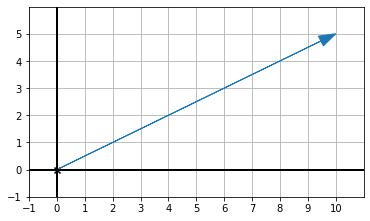

In [11]:
def scalar_product(scalar, vector):
    return (scalar * vector[0], scalar * vector[1])

v = (2, 1)
draw(Arrow(scalar_product(5, (2, 1)), color=blue))

It is also interesting the fact that *scalar multiplication* of a vector scales both components by the same factor.

$
v = (a, b) = (a, 0) + (0, b) \\
r \cdot v = r \cdot (a, b) = (r \cdot a, r \cdot b) = (r \cdot a, 0) + (0, r \cdot b) = r \cdot (a, 0) + r \cdot (0, b)
$

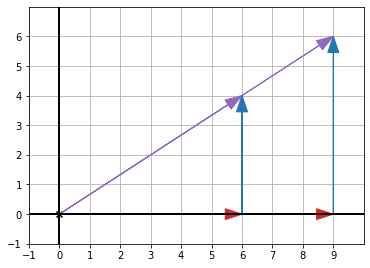

In [12]:
from vector_drawing import purple

v = (6, 4)
v_mod = scalar_product(1.5, v)

draw(
    Arrow(v, color=purple),         # original
    Arrow(v_mod, color=purple),     # result of scalar product
    Arrow((6, 0), color= red), Arrow(v, (6, 0), color=blue),
    Arrow((1.5 * 6, 0), color=red), Arrow(v_mod, (1.5 * 6, 0), color=blue)
    )

Multiplying a vector by a negative factor changes the direction of the original vector to be in the exact opposite direction

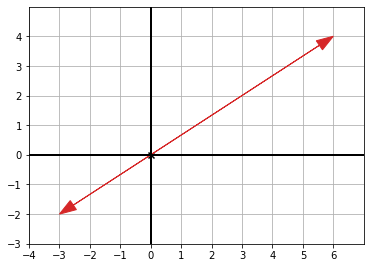

In [13]:
v_1 = (6, 4)
v_2 = scalar_product(-(1/2), v_1)

draw(Arrow(v_1), Arrow(v_2))

## Negating a vector

Given a vector $ v $, $ -v $ is the result of negating the vector, and can be calculated as:

$
Given \hspace{1ex} v = (a, b), \\ 
-v = -1 \cdot v = (-a, -b)
$

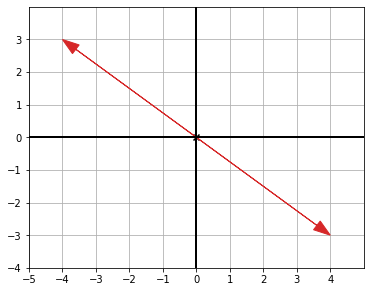

In [14]:
v = (-4, 3)

draw(Arrow(v), Arrow(scalar_product(-1, v)))

## Vector Subtraction &mdash; Displacement

Once *vector negation* has been introduced it is easier to define vector subtraction as:

$
Given \hspace{1ex} v = (a, b), w = (c, d) \\
v - w = v + (-w) = (a, b) + (-c, -d) = (a - c, b - d)
$

| NOTE: |
| :---- |
| See how we have built up a new concept from previously defined ones &mdash; this is a common pattern in Math |

The vector resulting from the subtraction if often called the *displacement vector* from $ v $ to $ w $.

(-3, 1)


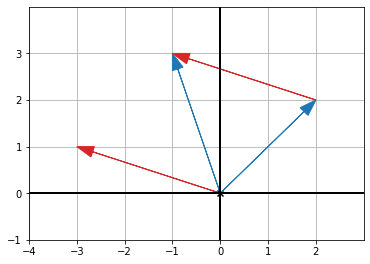

In [15]:
def negate(v):
    return (-v[0], -v[1])

def subtract(v1, v2):
    return add(v1, negate(v2))

v = (-1, 3)
w = (2, 2)
print(subtract(v, w))

draw(
    Arrow(v, color=blue), Arrow(w, color=blue),
    Arrow(subtract(v, w), color=red),
    Arrow(v, w, color=red) # seen as tip to toe
 )

The length of the *displacement vector* of $ v $ and $ w $ will compute the distance between the points identified by $ v $ and $ w $.

(3, -1)
Distance between v and w = 3.1622776601683795


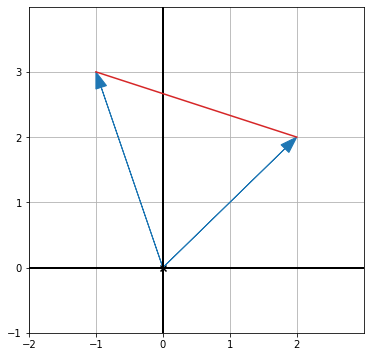

In [16]:
from vector_drawing import Segment

v = (2, 2)
w = (-1, 3)

displacement_vector = subtract(v, w)
print(displacement_vector)
print("Distance between v and w = %r" % length(displacement_vector))

draw(
    Arrow(v, color = blue),
    Arrow(w, color = blue),
    Segment(v, w, color = red)
)

With that information in place, and given a certain point (e.g. `(2, 2)`), we can calculate several points equidistant from it:

$ v = (2, 2) $

$ w $ is the vector that must be added to $ v $ so that the distance is $ \sqrt{10} $

$
length(v - w) = \sqrt{10} \\
length((2, 2) - (x, y)) = \sqrt{10} \\
\sqrt{(2 - x)^{2} + (2 - y)^{2}} = \sqrt{10} \\
(2 - x)^{2} + (2 - y)^{2} = 10 \\
(2 - y)^{2} = 10 - (2 - x)^{2} \\
2 - y = \pm \sqrt{10 - (2 - x)^{2}} \\
y = 2 \pm \sqrt{10 - (2 - x)^{2}}
$

Let's assume we want three equidistant points with $ x = \{-1, 3\} $

Thus, using the formula we get:
$
y = 2 - \sqrt{10 - (2 - x)^{2}}
$

For $ x = -1 $, $ y = 2 \pm 1 $

For $ x = 3 $, $ y = 2 \pm 3 $


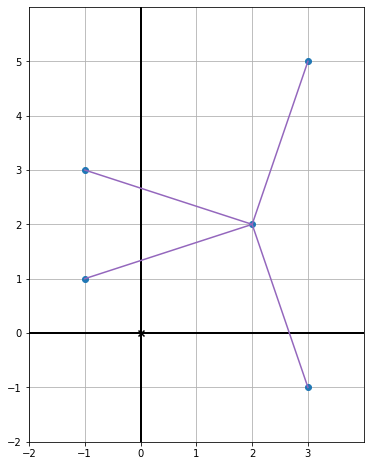

In [17]:
from vector_drawing import Points

draw(
    Points((2, 2), (-1, 1), (-1, 3), (3, -1), (3, 5), color=blue),
    Segment((2, 2), (-1, 1), color=purple), Segment((2, 2), (-1, 3), color=purple),
    Segment((2, 2), (3, -1), color=purple), Segment((2, 2), (3, 5), color=purple)
    )

We can even define a function that would give us the equidistant points from a given one:

[3.000000000000001, 0.9999999999999991]
[5.0, -1.0000000000000004]


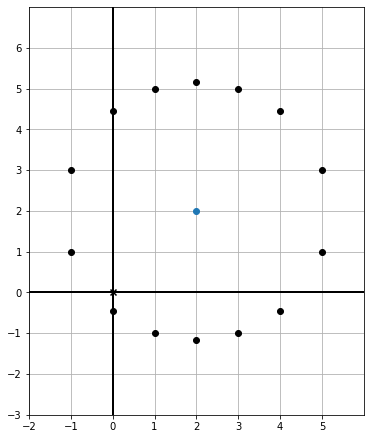

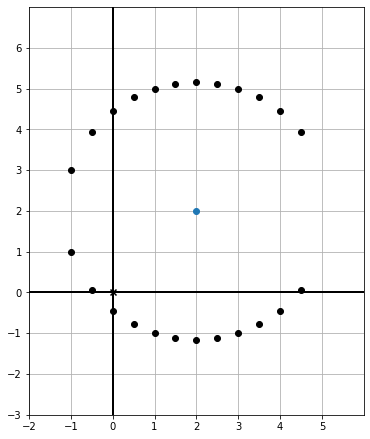

In [39]:
import numpy as np

def get_equidistant_y_coords(vector, distance, x_coord):
    result_plus = vector[1] + sqrt(distance ** 2 - ((vector[0] - x_coord) ** 2))
    result_minus = vector[1] - sqrt(distance ** 2 - ((vector[0] - x_coord) ** 2))
    return [result_plus, result_minus]

print(get_equidistant_y_coords((2, 2), sqrt(10), -1))
print(get_equidistant_y_coords((2, 2), sqrt(10), 3))

equidistant_points = [(x, get_equidistant_y_coords((2, 2), sqrt(10), x)[i]) for x in range(-1, 6) for i in [0, 1]]

draw(
    Points((2, 2), color=blue),
    Points(*equidistant_points)
)

# This can be improved using NumPy, which allows for a non-int step
equidistant_points = [(x, get_equidistant_y_coords((2, 2), sqrt(10), x)[i]) for x in np.arange(-1, 5, 0.5) for i in [0, 1]]

draw(
    Points((2, 2), color=blue),
    Points(*equidistant_points)
)